### Типы данных. Практика

In [3]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../data/data_flats.csv', sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
id                                       30469 non-null int64
full_sq                                  30469 non-null int64
life_sq                                  24086 non-null float64
floor                                    30302 non-null float64
sub_area                                 30469 non-null object
preschool_quota                          23781 non-null float64
preschool_education_centers_raion        30469 non-null int64
school_quota                             23784 non-null float64
school_education_centers_raion           30469 non-null int64
school_education_centers_top_20_raion    30469 non-null int64
hospital_beds_raion                      16029 non-null float64
healthcare_centers_raion                 30469 non-null int64
university_top_20_raion                  30469 non-null int64
sport_objects_raion                      30469 non-null int64
additional_e

Создадим тестовый набор данных:

In [4]:
test_data = pd.DataFrame([[1, 2, np.nan], 
                          [3, np.nan, 4],
                          [0, 1, 2]], columns=['one', 'two', 'three'])

В данных часто бывают пропуски, в Pandas их можно найти с помощью метода .isna():

In [5]:
test_data.isna()

,one,two,three
0,False,False,True
1,False,True,False
2,False,False,False


В местах пропусков у нас появится значение True.

Столбцы или строки с пропусками мы можем удалить с помощью метода .dropna(). При axis=0 удаляются строки, при 1 — столбцы, по умолчанию значение равно 0:

In [6]:
test_data.dropna(axis=0)

,one,two,three
2,0,1.0,2.0


Удаление строк и столбцов — грубое решение, из-за этого можно случайно убрать нужные данные. Поэтому лучше заменять пропуски статистиками или константным значением с помощью метода fillna():

In [7]:
test_data.fillna(-1)

,one,two,three
0,1,2.0,-1.0
1,3,-1.0,4.0
2,0,1.0,2.0


Какими статистиками можно заменить пропуски:

 - среднее значение np.mean();
 - максимальное значение np.max();
 - минимальное значение np.min();
 - медиана np.median().

Для удобства некоторые методы можно вызвать прямо у столбцов.

Загрузите данные train.csv, найдите признак, обозначающий штат. Затем найдите значение, которое встречается чаще всего. Замените пропуски этим значением и запишите получившийся признак в переменную result.

In [27]:
vis_data = pd.read_csv("../data/train.csv", encoding='ISO-8859-1', low_memory=False)

In [39]:
state_mode = vis_data.loc[:, 'state'].mode()[0]
display(state_mode)

'MI'

In [40]:
vis_data.loc[:, 'state'].value_counts().head(5)

MI    228601
CA      5020
TX      2420
FL      2237
IL      1310
Name: state, dtype: int64

In [41]:
vis_data.loc[:, 'state'].isna().sum()

93

In [42]:
result = vis_data.loc[:, 'state'].fillna(state_mode)

In [43]:
result.value_counts().head(5)

MI    228694
CA      5020
TX      2420
FL      2237
IL      1310
Name: state, dtype: int64

In [37]:
result.isna().sum()

93

Продолжим готовить к анализу наш Data set, посвященный квартирам, выставленным на продажу. Избавимся от пропусков. Просто удалять данные с пропусками довольно грубо. Однако если у вас большое количество объектов, и лишь крайне малая их доля имеет пропущенные значения, то это возможное допущение. Поступим здесь таким образом. Нас будут интересовать только те квартиры, про которые продавцы заполнили все данные. Удалите, пожалуйста, все строки, где есть хотя бы один пропуск. Сколько объектов осталось?

In [55]:
data = pd.read_csv('../data/data_flats.csv', sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [56]:
data.shape

(30469, 56)

In [57]:
data.dropna(axis=0).shape

(13652, 56)

## Стандартизация признаков

In [59]:
import pandas as pd
import numpy as np

test_data = pd.DataFrame([[1, 2, 0], 
                          [3, 0, 417],
                          [0, 10, -212]], columns=['one', 'two', 'three'])

Будем использовать пример из прошлого урока, изменив масштаб данных. Посмотрим, как с помощью методов нормализации, можно изменять масштаб признаков. В большинстве случаев хуже от этого метода не бывает, поэтому рекомендуется применять его всегда.

Один из стандартных способов нормализации — minmax нормализация, которая приводит независимо каждый признак к значению между 0 и 1. Для каждого признака мы находим минимальное и максимальное значение, из всех значений вычитаем минимальное значение и делим это на разницу между максимальным и минимальным значениями.

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(test_data)

array([[0.33333333, 0.2       , 0.33704293],
       [1.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ]])

Ещё один вид нормализации — std нормализация. Мы находим среднее значение для признака, затем стандартное отклонение, из каждого значения в текущем признаке вычитаем среднее значение для всего признака и делим на стандартное отклонение.

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(test_data)

array([[-0.26726124, -0.46291005, -0.26151831],
       [ 1.33630621, -0.9258201 ,  1.33438124],
       [-1.06904497,  1.38873015, -1.07286293]])

MinMaxScaler и StandardScaler сохраняют параметры, с которыми проводят нормализацию. Поэтому после нормализации признаков в тренировочной выборке нужно будет применить ту же нормализацию с валидационными и тестовыми данными.

Если признаки не несут важной информации или попали в набор данных по ошибке, то для их удаления можно применять метод .drop( ). Пример:

In [62]:
test_data.drop('one', axis=1)

,two,three
0,2,0
1,0,417
2,10,-212


Загрузите данные train.csv, найдите признак, обозначающий баланс. Нормализуйте признак с помощью std-нормализации. Проверьте, что вы нашли нужный признак и нормализовали его подходящим методом. Метод для нормализации принимает матрицу, а не массив. В numpy можно превратить массив в матрицу с помощью reshape(). В качестве ответа укажите минимальное значение в получившемся нормализованном признаке. Ответ округлите до 5 знаков после запятой.

In [64]:
df = pd.read_csv("../data/train.csv", encoding='ISO-8859-1', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
ticket_id                     250306 non-null int64
agency_name                   250306 non-null object
inspector_name                250306 non-null object
violator_name                 250272 non-null object
violation_street_number       250306 non-null float64
violation_street_name         250306 non-null object
violation_zip_code            0 non-null float64
mailing_address_str_number    246704 non-null float64
mailing_address_str_name      250302 non-null object
city                          250306 non-null object
state                         250213 non-null object
zip_code                      250305 non-null object
non_us_str_code               3 non-null object
country                       250306 non-null object
ticket_issued_date            250306 non-null object
hearing_date                  237815 non-null object
violation_code                250306 non-null obj

In [71]:
scaler_std = StandardScaler()

balance_std = scaler_std.fit_transform(df.loc[:, ['balance_due']])

In [80]:
balance_std.std()

1.0

In [70]:
display(balance_std)
display(round(balance_std.min(), 5))

array([[ 0.13613444],
       [-0.24315767],
       [-0.36683987],
       ...,
       [-0.36683987],
       [-0.36683987],
       [-0.36683987]])

-13.14733

## Визуализация признаков

Визуализации данных можно посветить отдельный курс, так как тема очень обширная, поэтому в рамках урока мы рассмотрим только два основных метода, с помощью которых можно начать смотреть на данные. Начнём с гистограммы, которая показывает распределение данных и выбросы.

Многие алгоритмы работают лучше, когда на вход принимают нормально распределённые данные. Один из способов сделать данные «нормальными» — взять логарифм. При этом не должно быть значений равных 0, иначе метод np.log выдаст бесконечность.

In [81]:
vis_data = pd.read_csv("../data/train.csv", encoding='ISO-8859-1', low_memory=False)

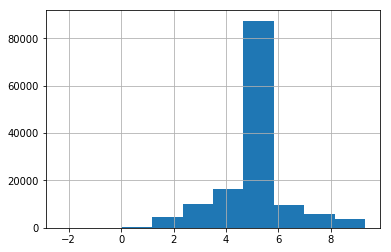

In [84]:
np.log(vis_data.balance_due[vis_data.balance_due > 0]).hist()

Если значения всё-таки начинаются с 0, то перед тем, как взять логарифм, можно прибавить к данным 1.

Другой способ — взять квадратный корень от данных:

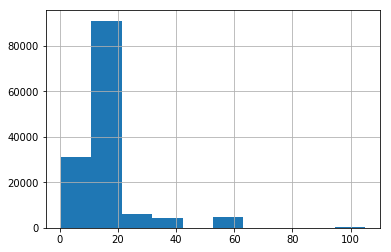

In [83]:
np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]).hist()

Таких способов много, вы можете их перебирать и смотреть, какой подойдёт больше.

Между некоторыми признаками есть некоторая линейная зависимость, то есть они сильно скоррелированы друг с другом. Если зависимость большая, то следует убрать часть скоррелированных признаков, так как они несут избыточную информацию. Для определения зависимости можно посчитать матрицу корреляции для признаков и построить, например, heatmap, чтобы проще было увидеть зависимость.

In [85]:
import seaborn as sns

corr = vis_data.drop(['violation_zip_code', 'payment_amount', 
                      'clean_up_cost', 
                      'violation_street_number'], axis=1).\
                dropna(axis=1).\
                corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ticket_id,admin_fee,state_fee,late_fee,discount_amount,judgment_amount,balance_due
ticket_id,1,-0.038,-0.038,-0.0057,-0.02,-0.013,0.0037
admin_fee,-0.038,1,1,0.29,0.027,0.32,0.28
state_fee,-0.038,1,1,0.29,0.027,0.32,0.28
late_fee,-0.0057,0.29,0.29,1,-0.014,0.99,0.95
discount_amount,-0.02,0.027,0.027,-0.014,1,0.041,-0.018
judgment_amount,-0.013,0.32,0.32,0.99,0.041,1,0.94
balance_due,0.0037,0.28,0.28,0.95,-0.018,0.94,1


Загрузите данные train.csv, найдите признак, обозначающий баланс. Для приведения данных к более нормальному виду часто используют различные преобразования, например, взятие корня от признака.
Возьмите корень у положительных значений, найдите медианное и среднее значение. В качестве ответа укажите модуль разницы этих значений.

In [86]:
df = pd.read_csv("../data/train.csv", encoding='ISO-8859-1', low_memory=False)
df.head(3)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [94]:
balance_due = df.loc[:, 'balance_due'] 

In [96]:
balance_due_norm = np.sqrt(balance_due[balance_due > 0])

bal_mean = balance_due_norm.mean()
bal_median = balance_due_norm.median()

abs(bal_median - bal_mean)

0.4525960609393067

Вернемся к первичному анализу наших данных по квартирам, выставленным на продажу. Предположим, что вы хотите проанализировать состояние цен на квартиры в нескольких  районах : "Лефортово", "Перово", "Басманное" и "Богородское". Для того, чтобы сравнить цены на квартирах в этих районах, можно использовать визуализацию с помощью боксплотов. Постройте боксплоты для распределения цен по этим районами (должно получиться четыре боксплота - по одному для каждого района). На основании полученных диаграмм ответьте на вопросы ниже.

In [97]:
data = pd.read_csv('../data/data_flats.csv', sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [112]:
df = data[data.loc[:, 'sub_area'].isin(['Lefortovo', 'Perovo', 'Basmannoe', 'Bogorodskoe'])]
display(df.head())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452
14,15,31,21.0,3.0,Lefortovo,1768.0,4,4564.0,4,0,...,0.600306,0.317270,1.028406,0.797255,1.510980,0.751314,2.883608,1.895468,poor,5000000
28,29,73,38.0,15.0,Bogorodskoe,3107.0,7,7277.0,9,0,...,1.058810,1.058810,0.260442,0.307315,1.153278,0.438261,4.161080,4.513773,poor,8254400
56,57,56,39.0,4.0,Bogorodskoe,3107.0,7,7277.0,9,0,...,0.378096,0.512312,0.653392,0.233796,1.715970,0.967472,5.197710,5.253872,poor,2000000
83,84,66,42.0,7.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.555870,0.360334,1.040341,1.175502,0.835839,0.640938,1.869625,0.700781,poor,990000


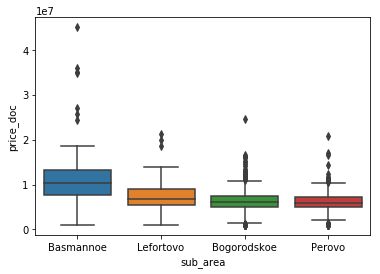

In [113]:
sns.boxplot(x='sub_area', y='price_doc', data=df)

## Feature Engineering

Создание новых признаков — трудоёмкий процесс, но он позволяет повысить точность модели при правильном использовании методов. Самое большое повышение точности обычно происходит после погружения Data Science разработчика в предметную область задачи.

Есть также автоматические/полуавтоматические методы создания новых признаков. Возьмём датасет vis_data и дополним его новой информацией:

In [114]:
import numpy as np
import pandas as pd
%matplotlib inline

vis_data = pd.read_csv("../data/train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)

vis_data = vis_data.drop(['violation_zip_code', 'clean_up_cost'], axis=1)
latlons = pd.read_csv("../data/latlons.csv")
vis_data = pd.concat([vis_data, latlons], axis=1)

FileNotFoundError: [Errno 2] File b'../data/latlons.csv' does not exist: b'../data/latlons.csv'

Существует несколько способов создания признаков, один из них — ручной метод, требующий погружение в предметную область. Более механический и менее интеллектуальный способ, является создание полиномиального признака. Новый признак получается путем перемножения и деления старых признаков друг на друга, а также для получения нового признака можно возводить старые в квадрат или извлекать корень.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(2)
poly_features = pf.fit_transform(vis_data[['balance_due', 'payment_amount']])
poly_features
poly_features.shape

Если у нас есть категориальные признаки, то их желательно заменять на Dummy-переменные. Брать один признак и смотреть, сколько у него уникальных категорий.

Для того, чтобы делать Dummy-переменные в Pandas, есть метод get_dummies:

In [ ]:
pd.get_dummies(vis_data.state).shape

Pandas поддерживает работу с датами. Выберем признак, содержащий время, уберём пропуски и преобразуем его в специальный формат для работы со временем:

In [ ]:
datetime_vals = pd.to_datetime(vis_data.payment_date.dropna())
datetime_vals.head()

Дальше можно вытаскивать информацию о годе, месяце, дне недели.

In [ ]:
datetime_vals[1].month

Данные для создания новых признаков можно использовать для расчёта различных статистик по данным. Например, минимум, максимум, стандартное отклонение и многие другие. Этот способ работает, если в данных содержится подобие временных рядов.

Загрузите данные train.csv, найдите признак, обозначающий баланс и признак, обозначающий размер скидки. Создайте полиномиальные признаки степени 3. Посчитайте среднее значение для каждого получившегося признака. В качестве ответа укажите номер признака, который содержит максимальное среднее значение.

In [115]:
df = pd.read_csv("../data/train.csv", encoding='ISO-8859-1', low_memory=False)
df.head(3)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [120]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(3)

In [121]:
poly_features = pf.fit_transform(df.loc[:, ['balance_due', 'discount_amount']])
display(poly_features)

array([[  1., 305.,   0., ...,   0.,   0.,   0.],
       [  1.,  75.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.]])

In [125]:
poly_features.mean(axis=0)

array([ 1.00000000e+00,  2.22449058e+02,  1.25166796e-01,  4.17195810e+05,
       -9.85531709e+00,  1.17817392e+01,  2.04200098e+09,  1.17924384e+05,
       -1.49564074e+02,  3.07417605e+03])

In [126]:
poly_features.mean(axis=0).max()

2042000980.3445694

Загрузите данные train.csv, найдите признак, обозначающий дату, когда был выписан штраф. Найдите, сколько раз штраф был выписан на выходных и запишите это число в качестве ответа.

In [130]:
datetime_vals = pd.to_datetime(df.loc[:, 'ticket_issued_date'].dropna())

In [134]:
(datetime_vals.dt.weekday > 4).sum()

1620

Ранее мы уже выяснили, что данные о квартирах не все числовые. Есть и признаки, которые содержат текстовые значения : ординальный (уровень экологии) и категориальный (район). Нам обязательно нужно перекодировать эти признаки, так как иначе мы не сможем в дальнейшем работать с этим датасетом и применять на нем какие-то математические алгоритмы. 

Ординальный признак мы можем перекодировать в числовой довольно простым способом: просто заменить каждое значение на число (4 - 'excellent', 3 - 'good' etc.).

Для этого необходимо:
 - создать словарь, сопоставляющий числовые значения от 0 до 4 описанию экологии от 'no data' до 'excellent' соответственно
 - заменить значения в колонке ecology на заданные нами выше с помощью метода .replace :

In [156]:
data = pd.read_csv('../data/data_flats.csv', sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [158]:
data.loc[:, 'ecology'].unique()

array(['good', 'excellent', 'poor', 'satisfactory', 'no data'],
      dtype=object)

In [157]:
ecology_dict = {'no data': 0, 
                'poor': 1,
                'satisfactory': 2,
                'good': 3,
                'excellent': 4
               }

In [159]:
data.ecology = data.ecology.replace(to_replace=ecology_dict)

In [160]:
data.loc[:, 'ecology'].unique()

array([3, 4, 1, 2, 0])

Теперь необходимо разобраться с переменной, содержащей информацию о районе.  Для этого воспользуйтесь методом get_dummies

In [151]:
data.shape

(30469, 56)

In [145]:
data.loc[:, 'sub_area'].nunique()

146

In [152]:
pd.get_dummies(data.loc[:, 'sub_area'], drop_first=False).head()

,Ajeroport,Akademicheskoe,Alekseevskoe,Altuf'evskoe,Arbat,Babushkinskoe,Basmannoe,Begovoe,Beskudnikovskoe,Bibirevo,...,Vnukovo,Vojkovskoe,Vostochnoe,Vostochnoe Degunino,Vostochnoe Izmajlovo,Vyhino-Zhulebino,Zamoskvorech'e,Zapadnoe Degunino,Zjablikovo,Zjuzino
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
round(data.loc[:, 'ecology'].mean(), 2)

1.73